# Diamond Price Prediction

In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [74]:
#reading files
data = pd.read_csv("diamonds.csv")

In [75]:
#displays first five rows of a table
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [76]:
data.shape

(53940, 11)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [78]:
#data cleaning
data=data.drop(['Unnamed: 0'], axis = 'columns')

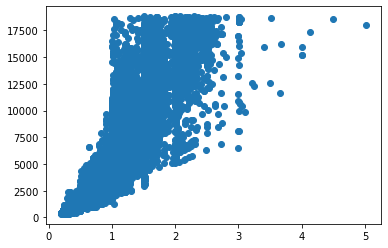

In [79]:
#scatter plot of carat and price data
import matplotlib.pyplot as plt

x = data['carat']
y = data['price']
plt.scatter(x,y)
plt.show()

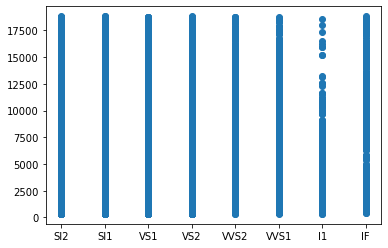

In [80]:
x = data['clarity']
y = data['price']
plt.scatter(x,y)
plt.show()

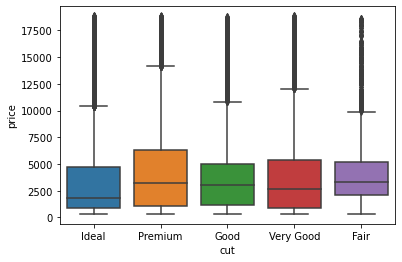

In [81]:
#plotting cut vs price data using boxplot
plt=sns.boxplot(data['cut'],data['price'])

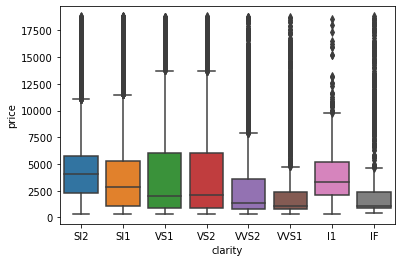

In [82]:
plt=sns.boxplot(data['clarity'],data['price'])

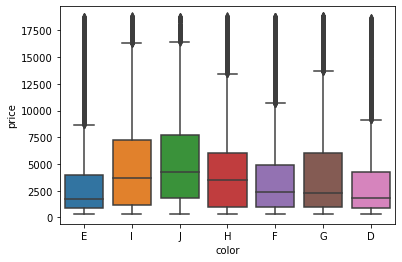

In [83]:
plt=sns.boxplot(data['color'],data['price'])

In [84]:
# Calculating size of the diamond
data["size"] = data["x"] * data["y"] * data["z"]
print(data)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  

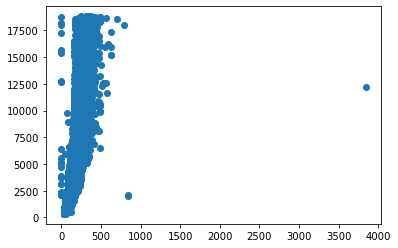

In [85]:
#scatter plot of size vs price data
import matplotlib.pyplot as plt
x = data['size']
y = data['price']
plt.scatter(x,y)
plt.show()

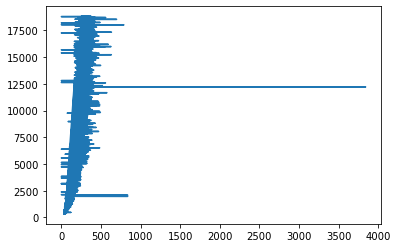

In [86]:
#line plot of size vs price data
import matplotlib.pyplot as plt
plt.plot(data['size'],data['price'])
 
plt.show()

In [87]:
#correlation table
data.corr() 

,carat,depth,table,price,x,y,z,size
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
size,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


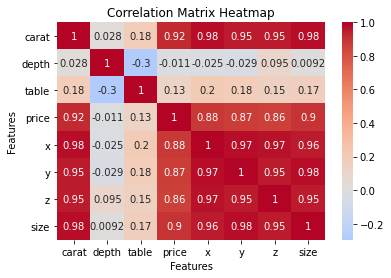

In [88]:
sns.heatmap(data.corr() , cmap='coolwarm',
            center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [89]:
#converting categorical variables into numerical values to predict price of a diamond
data["cut"] = data["cut"].map({"Ideal": 1, 
                               "Premium": 2, 
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

1. Compared to other diamonds, premium cut diamonds are comparatively larger.
2. The size of every diamond and its price have a linear connection.
  which comes to the conclusion that the most useful characteristics for predicting diamond prices are cut type, carat, and size.

 Additionally, we can forecast diamond prices using a linear regression model because the variables have a linear relationship.

In [90]:
X = np.array(data[["carat", "cut", "size"]])
Y = np.array(data[["price"]])


In [91]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10,random_state=42)

In [92]:
#Training linear regression for the task of Diamond price prediction
from sklearn.linear_model import LinearRegression


In [93]:
reg=LinearRegression()

In [94]:
reg.fit(X_train,Y_train)

LinearRegression()

In [95]:
reg.score(X_test,Y_test)

0.8512284941934997

In [96]:
score=reg.score(X_test,Y_test)
print(score*100)

85.12284941934996


In [97]:
print(reg.coef_)

[[ 7.50848204e+03 -1.79985514e+02  1.92420627e+00]]


In [98]:
print(reg.intercept_)

[-1905.74720607]


In [101]:
print('Predicted Diamond price =', reg.predict([[0.81,2,124.20]]))

Predicted Diamond price = [[4055.13864003]]
